In [17]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
import tensorflow as tf
import numpy as np
import os
import pandas as pd #資料處理
import torch
import matplotlib.pyplot as plt
from PIL import Image

# 設定dataset路徑
project_path = r"D:\NTUT\Weather_AI\self-project\GAN\weather-GAN"
train_data_path = str(project_path + r"\Train")
output_data_path = str(project_path + r"output_data")


In [18]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6291783197155833376
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5748293632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13079230287336825063
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [19]:
# Setup GPU
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus :
    tf.config.experimental.set_memory_growth(gpu, True)

In [20]:
for gpu in gpus :
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [21]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [117]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
class My_Dataset(Dataset) :
    def __init__(self, path, transform=None) :
        super().__init__()
        self.image_files = os.listdir(path)
        self.list_files = []
        for file in self.image_files :
            self.list_files.append(os.path.join(path, file))

    # Indicate the total size of the dataset
    def __len__(self) :
        return len(self.image_files)
    
    # 1. Read from file (using numpy.fromfile, PIL.Image.open)
    # 2. Preprocess the data (torchvision.Transform).
    # 3. Return the data (e.g. image and label)
    def __getitem__(self, index) :
        image = Image.open(self.list_files[index]).convert('RGB')
        if transform is None :
            return image
        else :
            image = transform(image)
            return image

#讀取圖片
if __name__ == '__main__' :
    #path_image = r"D:\NTUT\Weather_AI\self-project\GAN\weather-GAN\Train"
    path_image = train_data_path
    train_data = My_Dataset(path_image, transform=transform)
    train_dataloader = DataLoader(train_data, batch_size=10, shuffle=False)
    for image in train_dataloader :
        print(image.shape)
        #4(張), 3(RGB三通道), 3600(長), 3600(寬)縮成256*256
        break

torch.Size([10, 3, 64, 64])


In [101]:
img_path = ['./Train/0.jpg', './Train/1.jpg', './Train/2.jpg', './Train/3.jpg', './Train/4.jpg',  './Train/5.jpg'] 

batch_size = 1
image_paths_dataset = tf.data.Dataset.from_tensor_slices(img_path)

def load_and_preprocess_image(image_path) :
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [128, 128])
    image = tf.image.per_image_standardization(image)
    return image

image_dataset = image_paths_dataset.map(load_and_preprocess_image)
image_dataset = image_dataset.batch(batch_size)

for i in image_dataset :
    print(i)

tf.Tensor(
[[[[-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]
   ...
   [ 8.982813    7.802897   -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]]

  [[-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]
   ...
   [-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]]

  [[-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]
   ...
   [-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001  6.3011856  -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]]

  ...

  [[-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]
   ...
   [-0.13472001 -0.13472001 -0.13472001]
   [-0.13472001 -0.13472001 -0.13472001]
   [-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


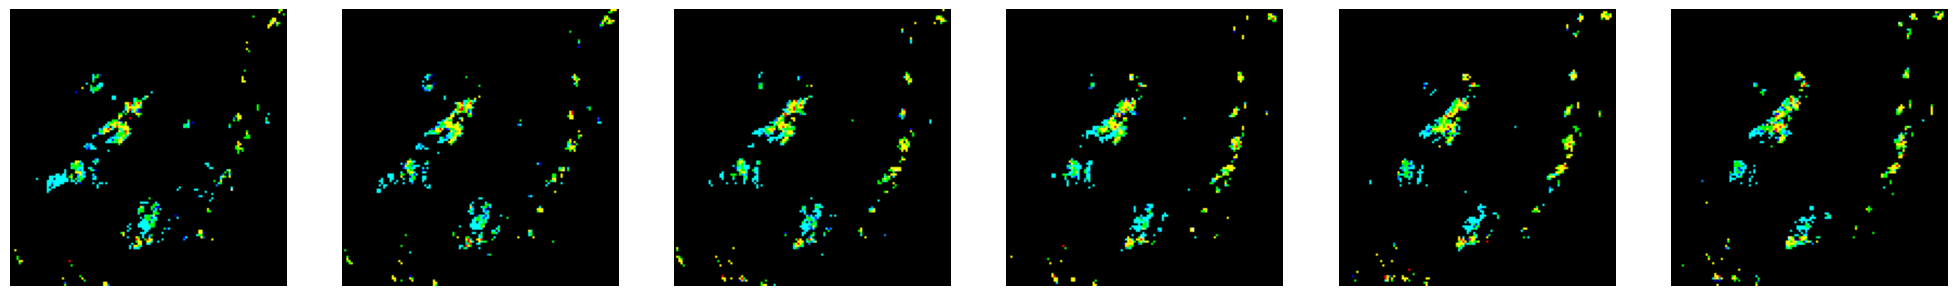

In [115]:
iterator = iter(image_dataset)

num_rows = 1
num_cols = 6
plt.figure(figsize=(25, 25))

for i in range(num_rows * num_cols) :
    batch = next(iterator)
    image = batch[0]

    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(image.numpy())
    plt.axis('off')

plt.show()

In [118]:
# 切割資料集
from sklearn.model_selection import train_test_split

train, test = train_test_split(image, test_size = 0.2, random_state = 42)
train = np.array(train)
test = np.array(test)

train.shape, test.shape

((8, 3, 64, 64), (2, 3, 64, 64))

In [63]:

# plt.imshow(np.transpose(test[0], (1, 2, 0)))
# plt.axis('off')
# plt.show()

In [64]:
# for i in range(len(train)) :
#     plt.imshow(np.transpose(train[i], (1, 2, 0)))
#     plt.axis('off')
#     plt.show()

In [13]:
print(train)

[[[[-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   ...
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]]

  [[-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -0.9647059
    -1.        ]
   ...
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]]

  [[-1.         -1.         -1.         ... -1.    

In [14]:
# 把所有圖片建立成一個Dataset--weather_dataset
weather_dataset = tf.data.Dataset.list_files("train_data/*.png")
# weather_dataset = np.array(weather_dataset)
# weather_dataset.shape
data_iterator = weather_dataset.as_numpy_iterator()
data_iterator.next()

b'train_data\\08_06_44.png'

Build Nerual Network

In [15]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the NN
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D, TimeDistributed, LSTM, Conv2DTranspose


Build generator

In [ ]:
# n_step = 6 #使用前6個時間段的圖去預測下一張圖

#     model = Sequential()

#     model.add(LSTM(50, activation='LeakyReLU', return_sequences=False, input_shape=(8, 64, 64, 3)))

#     model.add(Dense(1))

In [36]:
def build_generator() :
    model = Sequential()

    model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu'), input_shape = (8, 64, 64, 3)))

    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(64))

    model.add(Dense(64*64, activation = 'softmax'))

    return model

In [37]:
generator = build_generator()
generator.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 8, 62, 62, 64)    1792      
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 8, 246016)        0         
 stributed)                                                      
                                                                 
 lstm_7 (LSTM)               (None, 64)                62996736  
                                                                 
 dense_6 (Dense)             (None, 4096)              266240    
                                                                 
Total params: 63,264,768
Trainable params: 63,264,768
Non-trainable params: 0
_________________________________________________________________


In [38]:
img = generator.predict(np.random.randn(1, 8, 64, 64, 3))
img

1/1 [==============================] - 0s 237ms/step


array([[0.00023493, 0.00023507, 0.00024135, ..., 0.00024678, 0.00025412,
        0.00023344]], dtype=float32)

In [39]:
img.shape

(1, 4096)

In [40]:
len(img)

1

In [42]:
# for i in range(len(img)) :
#     plt.imshow(img[i])
#     plt.axis('off')
#     plt.show()

Build Discriminator

In [36]:
img.shape

(4, 10)

In [21]:
def build_discriminator() :
    model = Sequential()
    
    


    return model

In [22]:
img.shape

(4, 64, 64, 3)

In [23]:
discriminator = build_discriminator()

In [24]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 60, 60, 32)        0         
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 64)        51264     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 56, 56, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)      

In [25]:
discriminator.predict(img)

1/1 [==============================] - 3s 3s/step


array([[0.5044374 ],
       [0.50439006],
       [0.50441325],
       [0.5044054 ]], dtype=float32)

Training Loop

Setup Losses and Optimizers

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [27]:
# determine g & d's optimizer
generator_opt = Adam(learning_rate=0.0001)
discirminator_opt = Adam(learning_rate=0.00001)
# determine g & d's losses
generator_loss = BinaryCrossentropy()
discriminator_loss = BinaryCrossentropy()

Build Subclassed Model

In [28]:
# improting the base model class to subclass our training step
from tensorflow.keras.models import Model

In [29]:
class WeatherGAN(Model) : 
    # *args = any positional arg, **kwargs = keyboard args, those two parameters are make our function flexible
    def __init__(self, generator, discriminator, *args, **kwargs) :
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attribute for gen and dis
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, generator_opt, discirminator_opt, generator_loss, discriminator_loss, *args, **kwargs) :
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for optimizer and losses
        self.generator_opt = generator_opt
        self.discriminator_opt = discirminator_opt
        self.generator_loss = generator_loss
        self.discriminator_loss = discriminator_loss

    def train_step(self, batch) :
        # Get the data
        real_images = batch
        # Use generator to prediction fake image
        fake_images = self.generator(tf.random.normal((128, 128)), training = False)

        # Train the discriminator
        with tf.GradientTape() as d_tape :
            # Pass the real and fake images to the discriminator model
            real_images = tf.transpose(real_images, perm=[0, 3, 2, 1]) # Change the dimension to (None, 3, 256, 256)
            yhat_real = self.discriminator(real_images, training = True)
            yhat_fake = self.discriminator(fake_images, training = True)
            yhat_real_fake = tf.concat([yhat_real, yhat_fake], axis = 0) # Predictions(label) from discriminator

            # Create labels for the real and fake image
            y_real_fake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0) # Actual label, real image label = 0, fake image label = 1

            # Add some noise to the TRUE outputs
            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real)) # Uniform distribution
            noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
            y_real_fake += tf.concat([noise_real, noise_fake], axis = 0)

            # Calculate loss - BinaryCorss
            total_d_loss = self.discriminator_loss(y_real_fake, yhat_real_fake)

        # Apply backpropagation, nn learn. trainable_variables = the variable we want to calculate the gradients
        d_gradients = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) # Calculate gradient
        self.discriminator_opt.apply_gradients(zip(d_gradients, self.discriminator.trainable_variables)) # Apply gradients using optimizer

        # Train the generator
        with tf.GradientTape() as g_tape :
            # Generator some nwe images
            gene_images = self.generator(tf.random.normal((128, 128)), training = True)

            # Create the predicted labels, running our gene_images through the discriminator
            predicted_labels = self.discriminator(gene_images, training = False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.generator_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backpropagation
        g_gradients = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.generator_opt.apply_gradients(zip(g_gradients, self.generator.trainable_variables))

        return {"discriminator_loss":total_d_loss, "generator_loss":total_g_loss}
    # test & evaluation something
    def test_step(self) :
            pass
    

In [30]:
# Create instance of subclass model
weatherGan = WeatherGAN(generator, discriminator)

In [31]:
# Compile the model
weatherGan.compile(generator_opt, discirminator_opt, generator_loss, discriminator_loss)

Build Callback

In [32]:
# import os -> helps with folder navigation (import previously)
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback # Create out own custom callback on epoch

In [33]:
class ModelMonitor(Callback) :
    def __init__(self, num_img = 3, latent_dim = 128) : # latent_dim -> the random value that i passing to generator to generator a random image, num_img -> how much need to generate
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs = None) :
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim))
        generated_img = self.model.generator(random_latent_vectors)
        generated_img *= 255
        generated_img.numpy()
        for i in range(self.num_img) :
            img = array_to_img(generated_img[i])
            img.save(os.path.join('generated_images', f'generated_img_{epoch}_{i}.png'))


Train

In [34]:
train

array([[[[-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         ...,
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ]],

        [[-1.        , -1.        , -1.        , ...,  0.9892156 ,
          -1.        , -1.        ],
         [-1.        , -1.        , -1.        , ...,  1.        ,
           0.654902  , -1.        ],
         [-1.        , -1.        , -1.        , ...,  0.761397  ,
           0.43137252,  0.74117637],
         ...,
         [-1.        , -1.        

In [35]:
train.shape

(8, 3, 64, 64)

In [36]:
# Recommend 2000 epochs
#hist = weatherGan.fit(train, batch_size=8, epochs=20)
hist = weatherGan.fit(train, batch_size=2, epochs=10, callbacks=[ModelMonitor()])

Epoch 1/10


4/4 [==============================] - 727s 28s/step - discriminator_loss: 0.6074 - generator_loss: 0.8267
Epoch 2/10
4/4 [==============================] - 121s 32s/step - discriminator_loss: 0.5640 - generator_loss: 0.8554
Epoch 3/10
4/4 [==============================] - 99s 24s/step - discriminator_loss: 0.7110 - generator_loss: 0.7078
Epoch 4/10
4/4 [==============================] - 107s 28s/step - discriminator_loss: 0.7234 - generator_loss: 0.6994
Epoch 5/10
4/4 [==============================] - 92s 23s/step - discriminator_loss: 0.7164 - generator_loss: 0.7019
Epoch 6/10
4/4 [==============================] - 99s 25s/step - discriminator_loss: 0.7131 - generator_loss: 0.7045
Epoch 7/10
4/4 [==============================] - 92s 23s/step - discriminator_loss: 0.7029 - generator_loss: 0.7069
Epoch 8/10
4/4 [==============================] - 86s 21s/step - discriminator_loss: 0.6942 - generator_loss: 0.7092
Epoch 9/10
4/4 [==============================] - 89s 22s/step - discrim